In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path='/content/drive/MyDrive/datasets/mnist_png/train_Hnd'
valid_path='/content/drive/MyDrive/datasets/mnist_png/test_Hnd'
test_path='/content/drive/MyDrive/datasets/mnist_png/test_Hnd'

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path,target_size=(28,28),classes=['Sample0','Sample1','Sample2','Sample3','Sample4','Sample5','Sample6','Sample7','Sample8','Sample9'],batch_size=100)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path,target_size=(28,28),classes=['Sample0','Sample1','Sample2','Sample3','Sample4','Sample5','Sample6','Sample7','Sample8','Sample9'])
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path,target_size=(28,28),classes=['Sample0','Sample1','Sample2','Sample3','Sample4','Sample5','Sample6','Sample7','Sample8','Sample9'],shuffle=False)

Found 49439 images belonging to 10 classes.
Found 550 images belonging to 10 classes.
Found 550 images belonging to 10 classes.


In [ ]:
imgs,labels=next(train_batches)

In [ ]:
imgs.shape


(100, 28, 28, 3)

In [ ]:
labels.shape

(100, 10)

In [ ]:
def plotImages(images_arr):
  fig,axes=plt.subplots(1,10,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

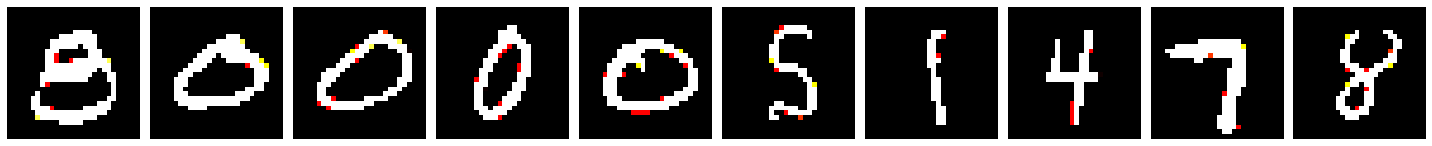

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0.

In [ ]:
import matplotlib.pyplot as plt

plotImages(imgs)
print(labels)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
model = Sequential([
    Conv2D(filters=8, kernel_size=(3, 3), activation='relu',padding='same', input_shape=(28,28,3)), 
    Conv2D(filters=8, kernel_size=(3, 3), activation='relu',padding='same'),
    MaxPool2D((2, 2)),

    Flatten(),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 8)         584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 16)                25104     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                        

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [ ]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=10,verbose=1)

Epoch 1/10


In [ ]:
predictions=model.predict(x=test_batches,verbose=0)
predictions.shape

(550, 10)

In [ ]:
predictions

array([[3.2332331e-02, 4.3156616e-19, 1.7802646e-06, ..., 9.5637018e-09,
        9.6766591e-01, 2.0927067e-10],
       [2.8507498e-03, 1.5406089e-21, 8.4961027e-10, ..., 8.7537053e-09,
        9.9714917e-01, 3.2363670e-09],
       [4.7580670e-14, 3.8416279e-25, 9.9871510e-01, ..., 8.5488935e-14,
        1.2849114e-03, 6.0992045e-12],
       ...,
       [5.1557366e-03, 3.2665454e-29, 5.8362589e-06, ..., 8.0615957e-12,
        9.9483830e-01, 1.5753226e-07],
       [3.0080305e-09, 7.7960102e-30, 1.1983419e-08, ..., 5.3576115e-12,
        9.9998510e-01, 1.4876241e-05],
       [3.8400540e-06, 2.0697036e-30, 1.3355460e-05, ..., 7.4666152e-13,
        9.9998081e-01, 2.0024434e-06]], dtype=float32)

In [ ]:
y_pred=np.argmax(predictions,axis=-1)
y_pred

array([8, 8, 2, 0, 8, 0, 8, 0, 0, 0, 8, 8, 8, 8, 0, 8, 8, 8, 0, 8, 0, 8,
       8, 8, 8, 8, 8, 8, 8, 0, 8, 0, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 8, 8,
       8, 0, 0, 8, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 0, 0, 0, 8, 8, 0, 6, 0, 8, 8, 8, 8, 8, 0, 8,
       8, 2, 0, 8, 8, 8, 8, 8, 8, 2, 8, 8, 0, 8, 8, 8, 0, 8, 8, 8, 8, 8,
       8, 8, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8,
       2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2, 2, 8, 8, 8, 8, 8, 8, 8, 2, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 7, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 0, 8, 8, 7, 8, 8, 8,
       0, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 8, 2, 8, 8, 0, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 0, 8, 0, 8, 8, 8, 0,
       8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 3, 8, 3, 9, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 2, 9, 8, 8, 9, 8, 8, 2, 8, 8, 9, 8, 9,

In [ ]:
y_true=test_batches.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm=confusion_matrix(y_true=y_true,y_pred=y_pred)

In [ ]:

def plot_confusion_matrix(cm,classes,normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

  """
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix,without Normalization')
    print(cm)


    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
      


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix,without Normalization
[[13  0  2  0  0  0  0  0 40  0]
 [10  0  2  0  0  0  1  0 42  0]
 [ 0  0  5  0  0  0  0  0 48  2]
 [ 1  0  1  1  0  0  0  2 47  3]
 [ 8  0  1  0  0  0  0  0 46  0]
 [ 0  0  3  2  0  0  0  0 44  6]
 [ 5  0  0  0  0  0  0  0 49  1]
 [ 0  0  7  0  0  0  0  5 43  0]
 [ 1  0  0  0  0  0  0  0 53  1]
 [ 1  0  1  0  0  0  0  0 53  0]]


<ipython-input-229-b31ba86e5ab3>:57: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


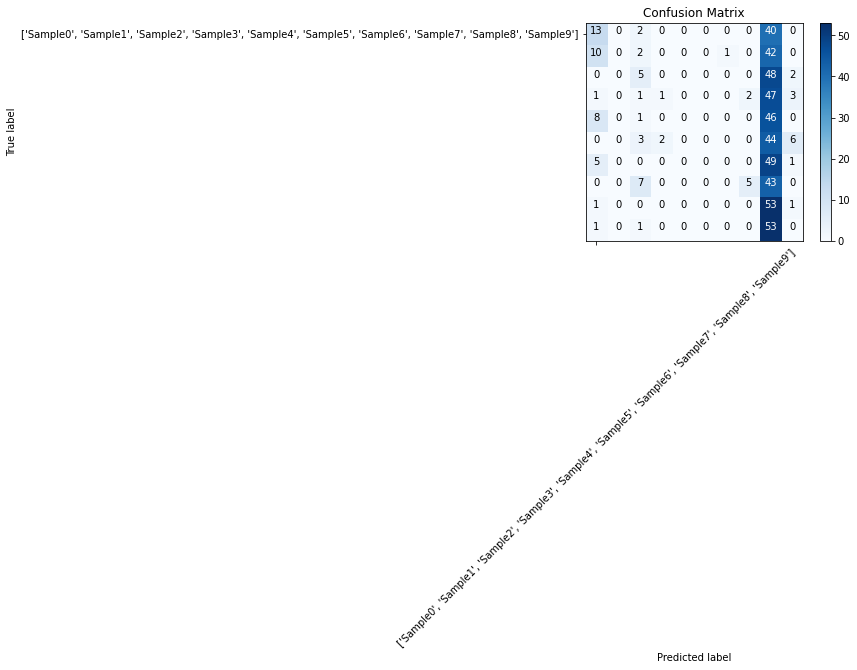

In [ ]:
cm_plot_labels=[['Sample0','Sample1','Sample2','Sample3','Sample4','Sample5','Sample6','Sample7','Sample8','Sample9']]
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')